#**MNIST Handwritten Digit Classification Using Deep Learning (Neural Network)**



---

Importing the Dependencies

---



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix



---
Loading the MNIST data from keras.datasets

---




In [16]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [17]:
type(X_train)

numpy.ndarray

In [18]:
# shape of numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)




---

Training Data = 60000 Images

Test Data = 10000 Images

---





---
Image Dimension --> 28 x 28

Grayscale Image --> 1 Channel

---




In [19]:
# printing a random Image and its shape
print(X_train[10])
print(X_train[10].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

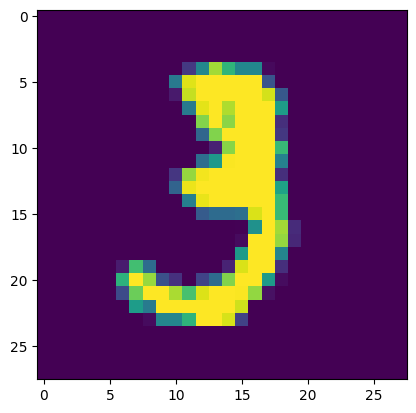

3


In [20]:
# displaying the image
plt.imshow(X_train[10])
plt.show()

# printing the corresponding label
print(Y_train[10])

Image Labels

In [21]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [22]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]




---

We can use these labels as such or we can also apply One Hot Encoding

All the images have same dimension in this dataset, If not, we have to resize all the images to a common dimension

---



In [23]:
# scaling the values
X_train = X_train / 255
X_test = X_test / 255

In [24]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    



---
Building the Neural Network


---



In [26]:
# setting up the layers of the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [27]:
# Compiling the Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Training the Neural Network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3068 - accuracy: 0.9103
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1437 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1085 - accuracy: 0.9666
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9718
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0731 - accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0635 - accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0545 - accuracy: 0.9825
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0481 - accuracy: 0.9842
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0422 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.036



---


Training Data Accuracy : 98.83%

---



**Accuracy on Test Data :**

In [29]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0938 - accuracy: 0.9740
0.09380874782800674
0.9739999771118164


---


Test Data Accuracy : 97.4%

---

In [30]:
print(X_test.shape)

(10000, 28, 28)


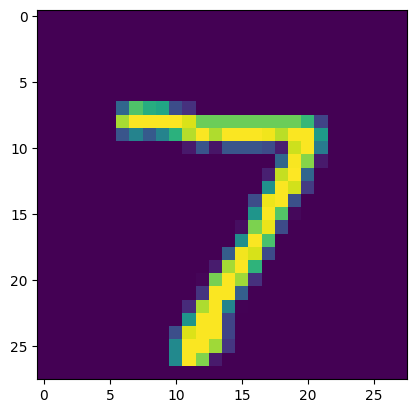

In [31]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [32]:
print(Y_test[0])

7


In [33]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
print(Y_pred.shape)

(10000, 10)


In [35]:
print(Y_pred[0])

[5.6596400e-05 8.6616809e-03 3.7464282e-01 9.3854505e-01 2.5196432e-09
 4.4857935e-04 1.5690017e-11 9.9999791e-01 4.2946390e-03 1.4725088e-01]


model.predict() gives the prediction probability of each class for that data point

In [36]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [37]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 8, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 3, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 



---


Y_test -->  True Labels

Y_pred_labels --> Predicted Labels

---



**Confusion Matrix**

In [38]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [39]:
print(conf_mat)

tf.Tensor(
[[ 961    0    1    2    0    6    4    0    5    1]
 [   0 1123    4    0    0    1    2    0    5    0]
 [   2    0 1014    4    2    0    0    3    7    0]
 [   0    1    7  970    0   12    0    4   13    3]
 [   1    0    4    0  962    2    2    3    2    6]
 [   2    0    0    6    1  869    6    2    5    1]
 [   3    2    1    0    1    9  937    0    5    0]
 [   1    7   15    1    2    1    0  992    4    5]
 [   3    0    3    3    1    8    3    2  949    2]
 [   2    3    0    6   14    4    0    9    8  963]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True Labels')

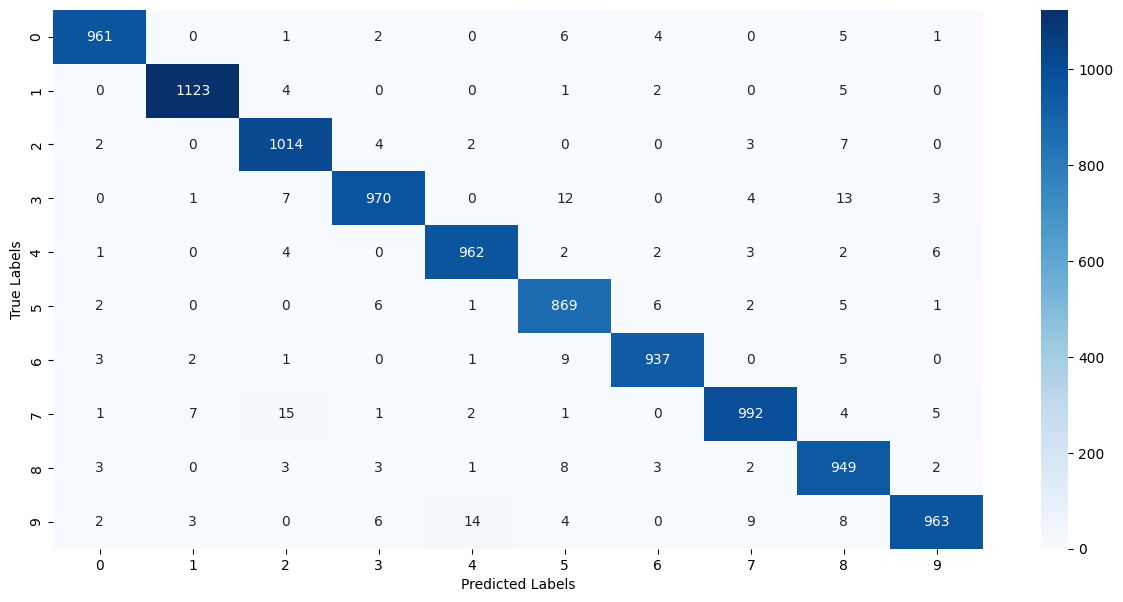

In [41]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

**Building a predictive system**

In [43]:
input_image_path = '/content/sample.png'
input_image = cv2.imread(input_image_path)

In [44]:
type(input_image)

numpy.ndarray

In [45]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [47]:
cv2_imshow(input_image)

In [49]:
input_image.shape

(28, 28, 3)

In [50]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [51]:
grayscale.shape

(28, 28)

In [52]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [53]:
input_image_resize.shape

(28, 28)

In [54]:
cv2_imshow(input_image_resize)

In [55]:
input_image_resize = input_image_resize/255

In [56]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [57]:
type(image_reshaped)

numpy.ndarray

In [58]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 76ms/step
[[1.5219721e-06 2.2765214e-02 6.7462057e-01 9.4422489e-01 1.6147253e-10
  2.6434404e-06 3.4689872e-14 9.9999976e-01 1.8190702e-03 3.5516784e-02]]


In [60]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

7




---

**Predicitve System :**

---



In [61]:
input_image_path = input('Path of the image to be predicted :')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)


Path of the image to be predicted :/content/sample.png


1/1 [==============================] - 0s 31ms/step
The Handwritten Digit is recognised as  7
